In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os

In [2]:
# Define path components
#folder = 'Resources'
#filename = 'health_data_tobacco.csv'

# Construct full path
csv_path = os.path.join('Resources', 'health_data_tobacco.csv' )

# Read the CSV file
tobacco_df = pd.read_csv(csv_path, low_memory=False)

In [3]:
# Show the first few rows of the data
tobacco_df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2019,2019,US,United States,STATE,Tobacco,Sale of cigarette packs,NaN,pack sales per capita,Number,...,59,TOB,TOB10_0,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
1,2020,2020,MI,Michigan,STATE,Tobacco,States that allow stronger local tobacco contr...,NaN,NaN,Yes/No,...,26,TOB,TOB4_0,YESNO,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2014,2014,AK,Alaska,STATE,Tobacco,Sale of cigarette packs,NaN,pack sales per capita,Number,...,2,TOB,TOB10_0,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2018,2018,ME,Maine,STATE,Tobacco,Amount of tobacco product excise tax,NaN,NaN,Yes/No,...,23,TOB,TOB7_0,YESNO,OVERALL,OVR,NaN,NaN,NaN,NaN
4,2017,2017,WY,Wyoming,STATE,Tobacco,Sale of cigarette packs,NaN,pack sales per capita,Number,...,56,TOB,TOB10_0,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN


In [4]:
# Filter the data for 'Tobacco' in the 'Topic' column
tobacco_data = tobacco_df[tobacco_df['Topic'] == 'Tobacco']

# Convert the 'DataValue' column to numeric, coercing non-numeric values to NaN
tobacco_data['DataValue'] = pd.to_numeric(tobacco_data['DataValue'], errors='coerce')

# Drop rows where 'DataValue' is NaN (this will remove non-numeric values)
tobacco_data_clean = tobacco_data.dropna(subset=['DataValue'])

# Group by 'LocationDesc' and sum the 'DataValue' column
tobacco_by_state = tobacco_data_clean.groupby('LocationDesc')['DataValue'].sum().reset_index()

# Sort the result by 'DataValue' in descending order
tobacco_by_state_sorted = tobacco_by_state.sort_values(by='DataValue', ascending=False)

# Display the sorted result
print(tobacco_by_state_sorted)

            LocationDesc  DataValue
37              Oklahoma   27112.60
28              Nebraska   25962.30
17                Kansas   25095.00
23              Michigan   25026.10
24             Minnesota   24929.30
51            Washington   24658.60
33              New York   24237.30
18              Kentucky   23866.60
26              Missouri   23341.20
22         Massachusetts   23270.00
36                  Ohio   23257.00
42        South Carolina   23000.60
27               Montana   22890.90
32            New Mexico   22822.10
21              Maryland   22782.70
39          Pennsylvania   22574.20
5               Colorado   22151.60
15               Indiana   22151.30
45                 Texas   22135.80
34        North Carolina   21960.00
0                Alabama   21820.50
3               Arkansas   21778.40
12                Hawaii   21764.20
43          South Dakota   21497.10
53             Wisconsin   21481.50
25           Mississippi   21428.30
52         West Virginia   2

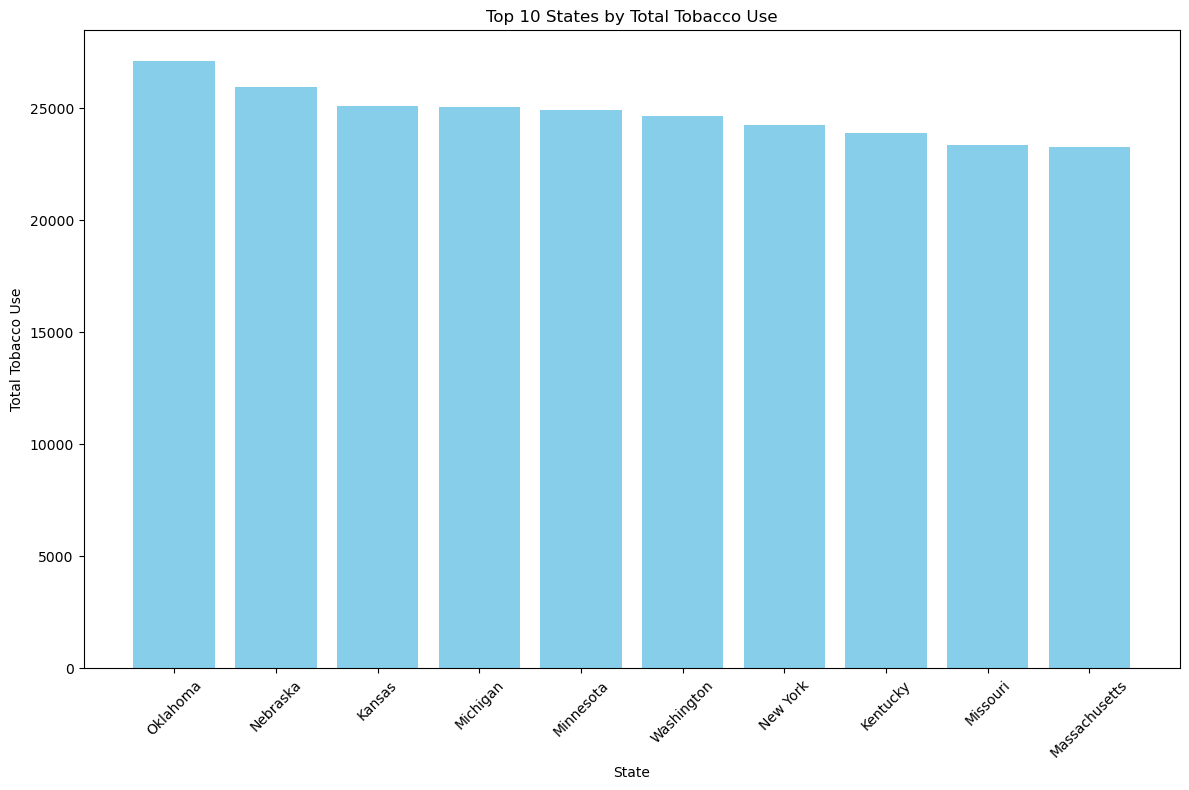

In [5]:
# Plot the data as a bar plot
plt.figure(figsize=(12, 8))  # Set the figure size

# Create a bar plot (for the top 10 states for example)
plt.bar(tobacco_by_state_sorted['LocationDesc'][:10], tobacco_by_state_sorted['DataValue'][:10], color='skyblue')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Total Tobacco Use')
plt.title('Top 10 States by Total Tobacco Use')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

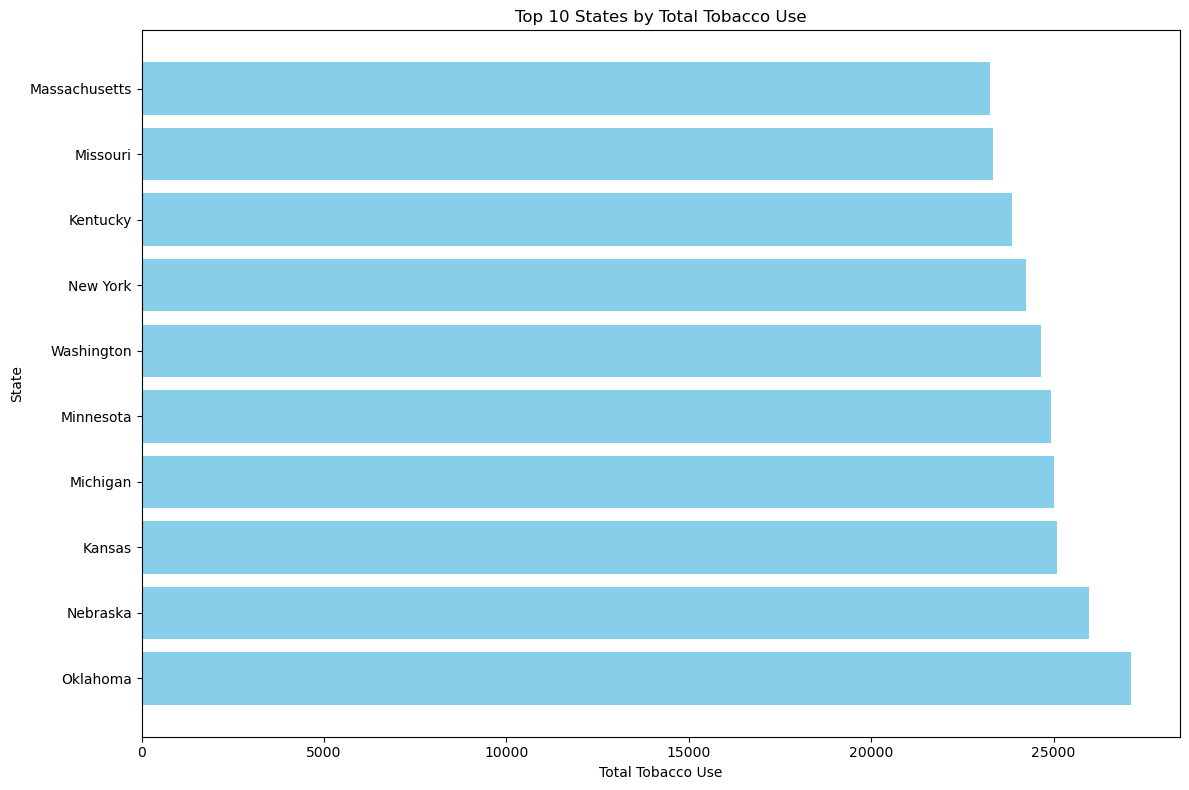

In [6]:
# Horizontal bar plot
plt.figure(figsize=(12, 8))

# Create a horizontal bar plot (for the top 10 states for example)
plt.barh(tobacco_by_state_sorted['LocationDesc'][:10], tobacco_by_state_sorted['DataValue'][:10], color='skyblue')

# Add labels and title
plt.ylabel('State')
plt.xlabel('Total Tobacco Use')
plt.title('Top 10 States by Total Tobacco Use')

# Show the plot
plt.tight_layout()
plt.show()

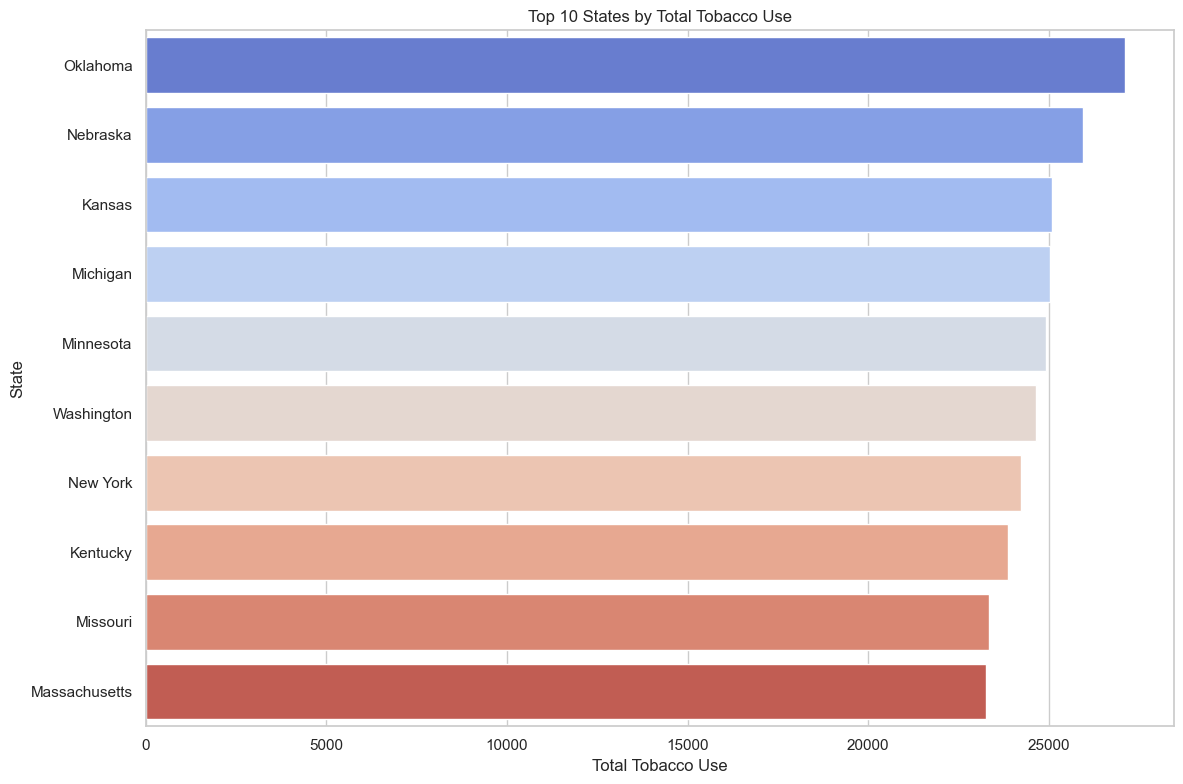

In [7]:
# Set the plot style
sns.set(style="whitegrid")

# Create a bar plot (for the top 10 states for example)
plt.figure(figsize=(12, 8))
sns.barplot(x='DataValue', y='LocationDesc', data=tobacco_by_state_sorted.head(10), palette='coolwarm')

# Add labels and title
plt.xlabel('Total Tobacco Use')
plt.ylabel('State')
plt.title('Top 10 States by Total Tobacco Use')

# Show the plot
plt.tight_layout()
plt.show()

In [8]:
plt.savefig('tobacco_use_by_state.png')
plt.show()

<Figure size 640x480 with 0 Axes>

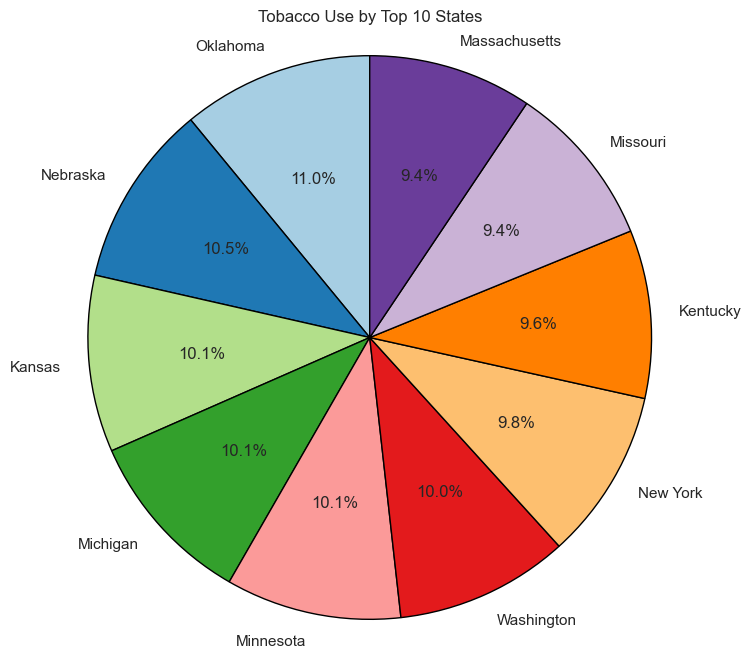

In [9]:
# Data preparation (for the top 10 states, or you can choose all if desired)
top_10_states = tobacco_by_state_sorted.head(10)

# Create a pie chart
plt.figure(figsize=(8, 8))  # Set the figure size

# Pie chart creation
plt.pie(top_10_states['DataValue'], 
        labels=top_10_states['LocationDesc'], 
        autopct='%1.1f%%',  # Display percentage
        startangle=90,      # Start the pie chart at 90 degrees
        colors=plt.cm.Paired.colors[:10],  # Choose colors from a colormap
        wedgeprops={'edgecolor': 'black'}) # Add edge color to wedges

# Add title
plt.title('Tobacco Use by Top 10 States')

# Equal aspect ratio ensures the pie chart is circular
plt.axis('equal')

# Show the plot
plt.show()

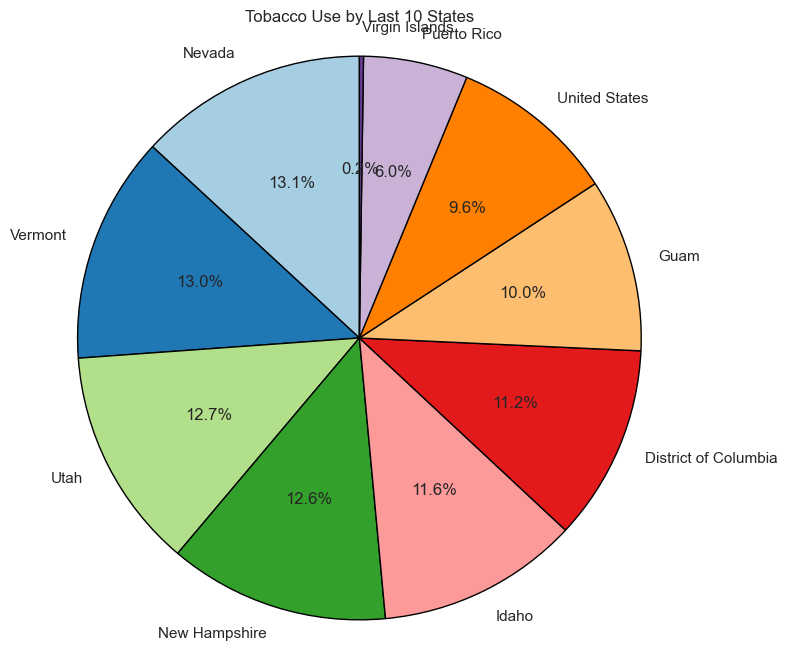

In [10]:
# Data preparation (for the last 10 states)
last_10_states = tobacco_by_state_sorted.tail(10)  # Use tail() to get the last 10 states

# Create a pie chart
plt.figure(figsize=(8, 8))  # Set the figure size

# Pie chart creation
plt.pie(last_10_states['DataValue'], 
        labels=last_10_states['LocationDesc'], 
        autopct='%1.1f%%',  # Display percentage
        startangle=90,      # Start the pie chart at 90 degrees
        colors=plt.cm.Paired.colors[:10],  # Choose colors from a colormap
        wedgeprops={'edgecolor': 'black'}) # Add edge color to wedges

# Add title
plt.title('Tobacco Use by Last 10 States')

# Equal aspect ratio ensures the pie chart is circular
plt.axis('equal')

# Show the plot
plt.show()

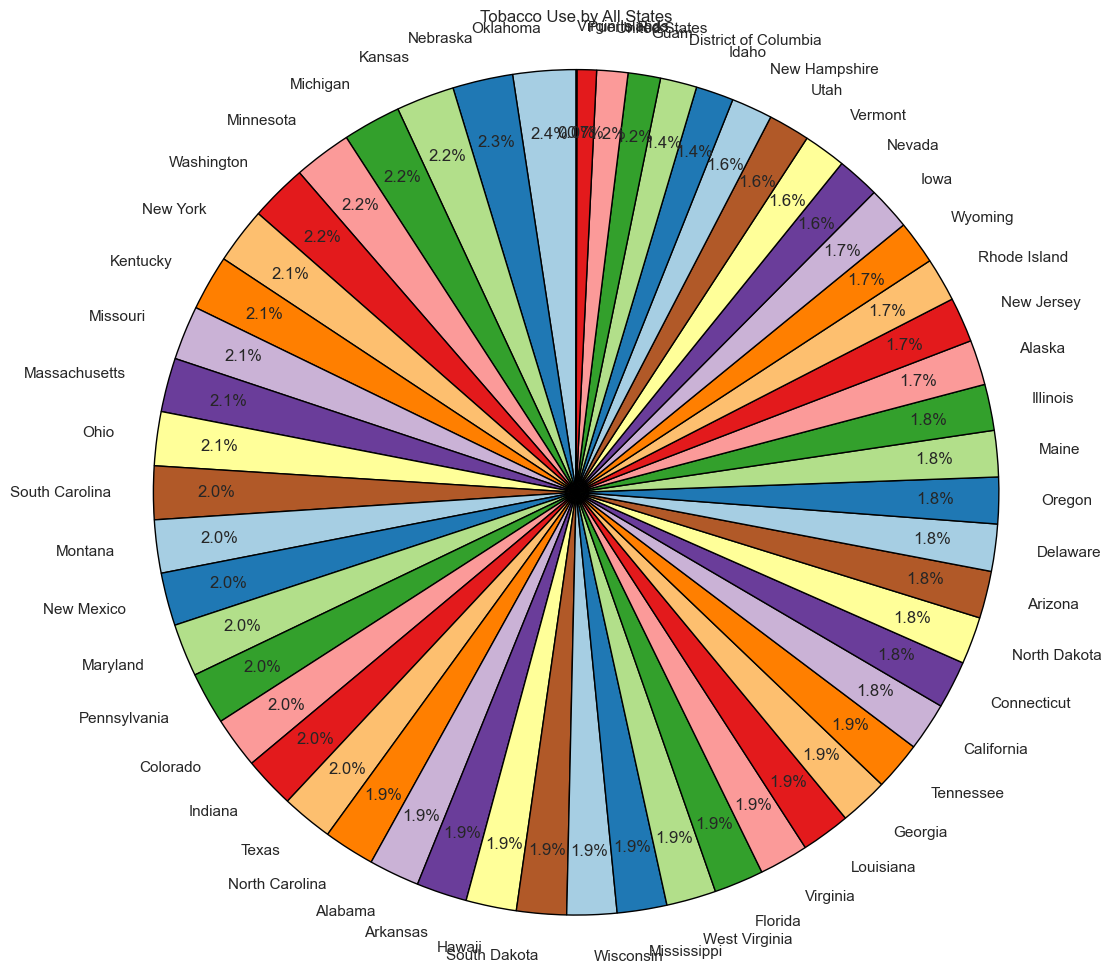

In [11]:
# Data preparation (for all states)
all_states = tobacco_by_state_sorted  # Use the entire sorted DataFrame

# Create a pie chart
plt.figure(figsize=(12, 12))  # Set the figure size to accommodate all states

# Pie chart creation
plt.pie(all_states['DataValue'], 
        labels=all_states['LocationDesc'], 
        autopct='%1.1f%%',  # Display percentage
        startangle=90,      # Start the pie chart at 90 degrees
        colors=plt.cm.Paired.colors,  # Choose colors from a colormap
        wedgeprops={'edgecolor': 'black'},  # Add edge color to wedges
        pctdistance=0.85)  # Adjust distance of percentage text

# Add title
plt.title('Tobacco Use by All States')

# Equal aspect ratio ensures the pie chart is circular
plt.axis('equal')

# Show the plot
plt.show()

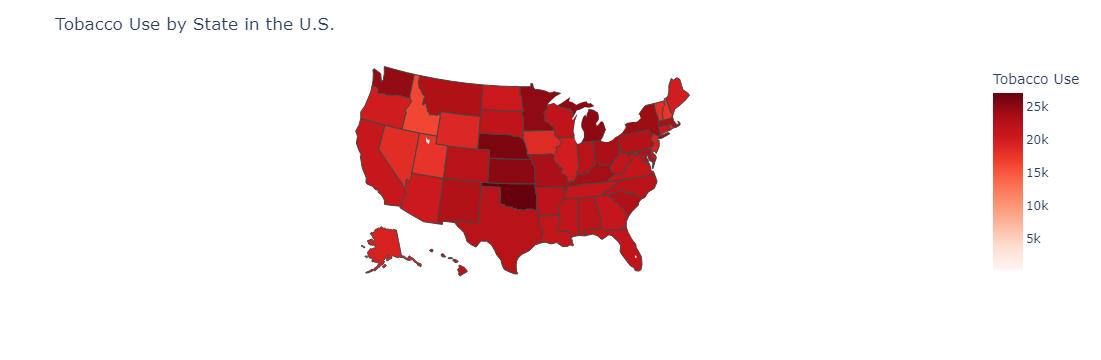

In [20]:
import plotly.express as px

# Dictionary to map state names to abbreviations
state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 
    'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Map full state names to abbreviations in your DataFrame
tobacco_by_state_sorted['StateAbbrev'] = tobacco_by_state_sorted['LocationDesc'].map(state_abbrev)

# Create a choropleth map using the state abbreviations
fig = px.choropleth(tobacco_by_state_sorted, 
                    locations='StateAbbrev',  # Use the new column with state abbreviations
                    locationmode='USA-states',  # Match state abbreviations
                    color='DataValue',  # Data to color code by
                    hover_name='LocationDesc',  # Info on hover
                    color_continuous_scale='Reds',  # Color scale
                    scope='usa',  # Limit map to USA
                    labels={'DataValue':'Tobacco Use'}  # Label for color bar
                   )

# Add title
fig.update_layout(title_text='Tobacco Use by State in the U.S.', geo_scope='usa')

# Show the figure
fig.show()

In [16]:
# Ensure DataValue column is numeric (convert any non-numeric values to NaN)
tobacco_df['DataValue'] = pd.to_numeric(tobacco_df['DataValue'], errors='coerce')

# Filter only the relevant questions
questions_of_interest = [
    'Current cigarette smoking among youth',
    'Current smokeless tobacco use among youth',
    'Current smoking before pregnancy',
    'Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years who smoke',
    'Current smokeless tobacco use among adults aged >= 18 years',
    'Current smoking among adults aged >= 18 years',
    'Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years who smoke',
    'Current cigarette smoking among women aged 18-44 years',
    'Current smokeless tobacco use among women aged >= 18 years',
    'Quit attempts in the past year among current smokers'
]

# Filter the dataframe to include only rows with these questions
filtered_df = tobacco_df[tobacco_df['Question'].isin(questions_of_interest)]

# Group by Question and LocationDesc (state) and get the DataValue for each
grouped_data = filtered_df.groupby(['Question', 'LocationDesc'])['DataValue'].mean().unstack()

# Display the result
grouped_data

LocationDesc,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Texas,United States,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Question,,,,,,,,,,,,,,,,,,,,,
Current cigarette smoking among women aged 18-44 years,22.023529,22.932432,13.628125,27.172414,10.891304,16.282500,14.030952,19.877419,15.912000,16.025641,...,14.920455,17.827273,8.337500,18.281818,NaN,17.010526,15.357447,32.295455,19.488462,22.116667
Current cigarette smoking among youth,12.018750,10.530769,9.363636,13.033333,5.892308,6.130000,8.153846,9.673684,5.485714,7.142857,...,8.316667,10.278125,3.453333,10.887500,NaN,7.132143,NaN,16.537500,8.005263,18.509091
Current smokeless tobacco use among adults aged >= 18 years,5.756140,6.793805,3.081600,6.769307,1.817647,3.862963,1.687629,2.645122,1.309459,2.866337,...,4.002586,4.183333,2.857282,3.311688,0.000000,3.926471,3.329204,9.123256,4.069767,10.413861
Current smokeless tobacco use among youth,9.912500,9.920000,3.700000,9.792857,3.942857,NaN,2.483333,3.987500,4.600000,NaN,...,4.807692,5.400000,2.245455,5.429412,NaN,3.837500,NaN,11.070000,4.715385,12.900000
Current smoking among adults aged >= 18 years,22.867702,21.946000,16.362353,25.083636,12.256000,16.992045,15.108046,18.219255,15.929861,16.858125,...,16.253143,17.634848,11.060645,20.646324,7.488889,16.523864,15.067614,28.082822,19.737805,22.524306
Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years who smoke,24.557273,25.172727,26.900000,25.574257,25.304478,25.681818,23.656911,25.618868,28.241837,23.450435,...,24.527778,25.290909,25.514706,30.131818,NaN,25.069091,29.904000,25.931818,29.467708,23.760227
Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years who smoke,64.398889,56.321154,63.431395,65.327273,60.671951,68.310227,61.288372,66.537143,53.398214,57.221951,...,61.972222,63.621212,64.206944,65.804762,NaN,65.586364,68.745455,63.369318,68.614286,59.194318
Quit attempts in the past year among current smokers,64.933654,59.920755,60.117355,61.151000,61.722222,62.701587,66.557500,61.674576,66.467000,65.286301,...,63.202985,59.113636,62.869298,56.913636,79.550000,62.955932,59.806494,54.708696,61.267925,55.904545


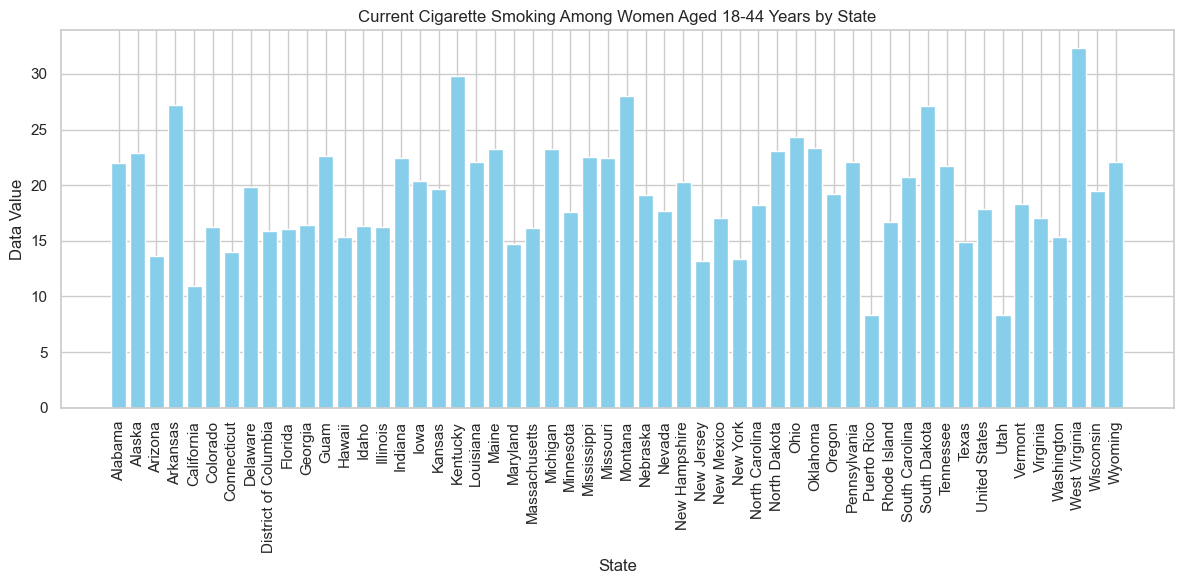

In [21]:
# Filter the data for the question 'Current cigarette smoking among women aged 18-44 years'
smoking_women_df = grouped_data.loc['Current cigarette smoking among women aged 18-44 years']

# Drop any NaN values (if any)
smoking_women_df = smoking_women_df.dropna()

# Plot the data as a bar chart
plt.figure(figsize=(12, 6))  # Set the figure size
plt.bar(smoking_women_df.index, smoking_women_df.values, color='skyblue')

# Add title and labels
plt.title('Current Cigarette Smoking Among Women Aged 18-44 Years by State')
plt.xlabel('State')
plt.ylabel('Data Value')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

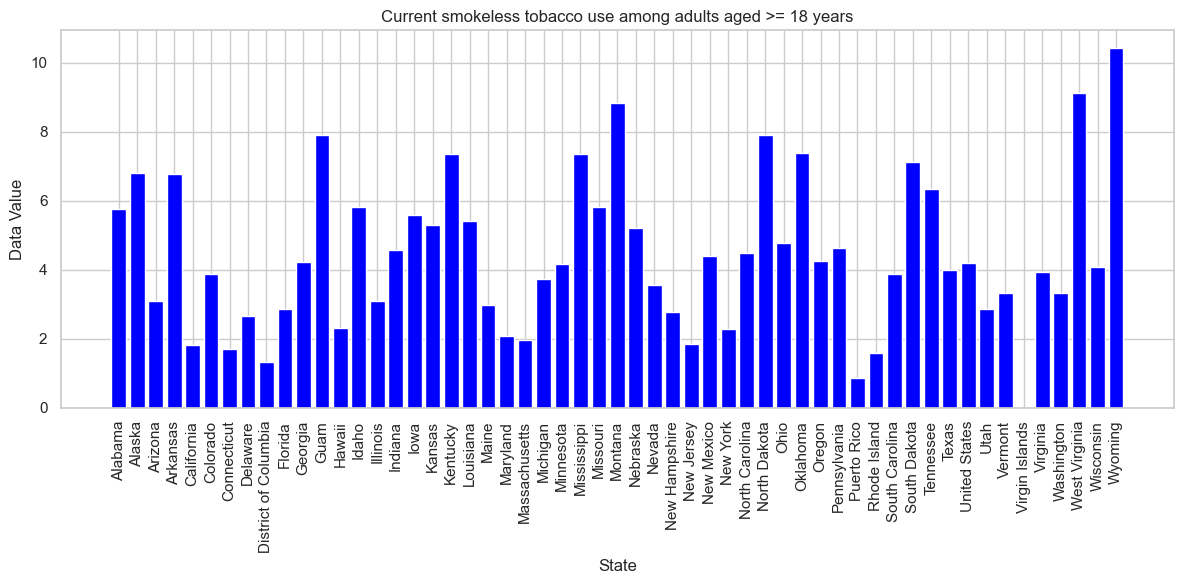

In [28]:
# Filter the data for the question 'Current smokeless tobacco use among adults aged >= 18 years'
smokeless_tobacco_adults_df = grouped_data.loc['Current smokeless tobacco use among adults aged >= 18 years']

# Drop any NaN values (if any)
smokeless_tobacco_adults_df = smokeless_tobacco_adults_df.dropna()

# Plot the data as a bar chart
plt.figure(figsize=(12, 6))  # Set the figure size
plt.bar(smokeless_tobacco_adults_df.index, smokeless_tobacco_adults_df.values, color='blue')

# Add title and labels
plt.title('Current smokeless tobacco use among adults aged >= 18 years')
plt.xlabel('State')
plt.ylabel('Data Value')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

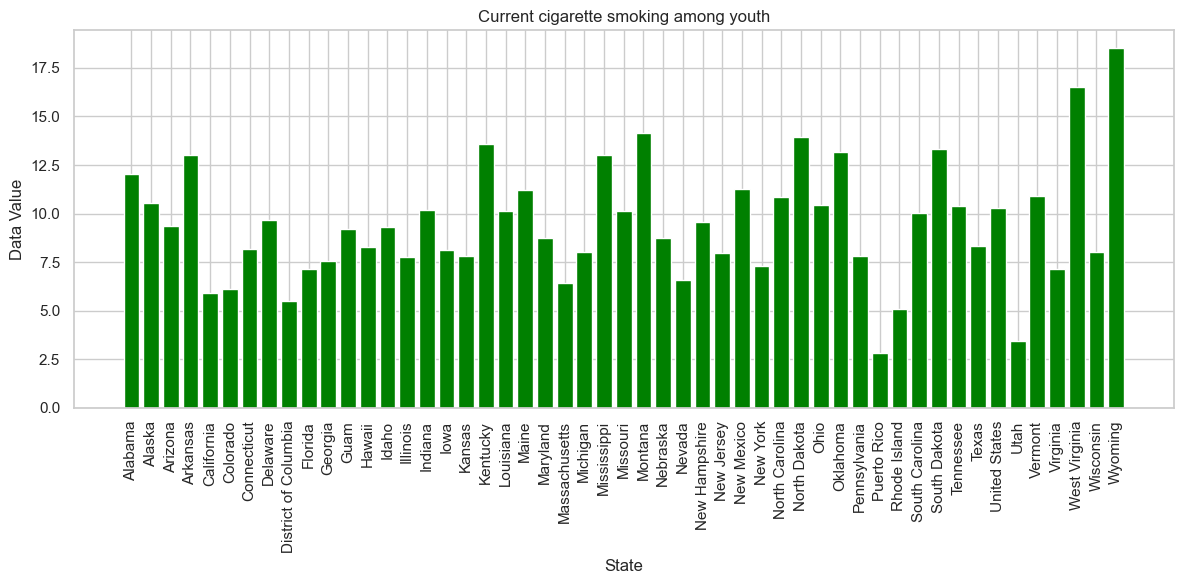

In [23]:
# Filter the data for the question 'Current cigarette smoking among youth'
smoking_among_youth_df = grouped_data.loc['Current cigarette smoking among youth']

# Drop any NaN values (if any)
smoking_among_youth_df = smoking_among_youth_df.dropna()

# Plot the data as a bar chart
plt.figure(figsize=(12, 6))  # Set the figure size
plt.bar(smoking_among_youth_df.index, smoking_among_youth_df.values, color='green')

# Add title and labels
plt.title('Current cigarette smoking among youth')
plt.xlabel('State')
plt.ylabel('Data Value')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

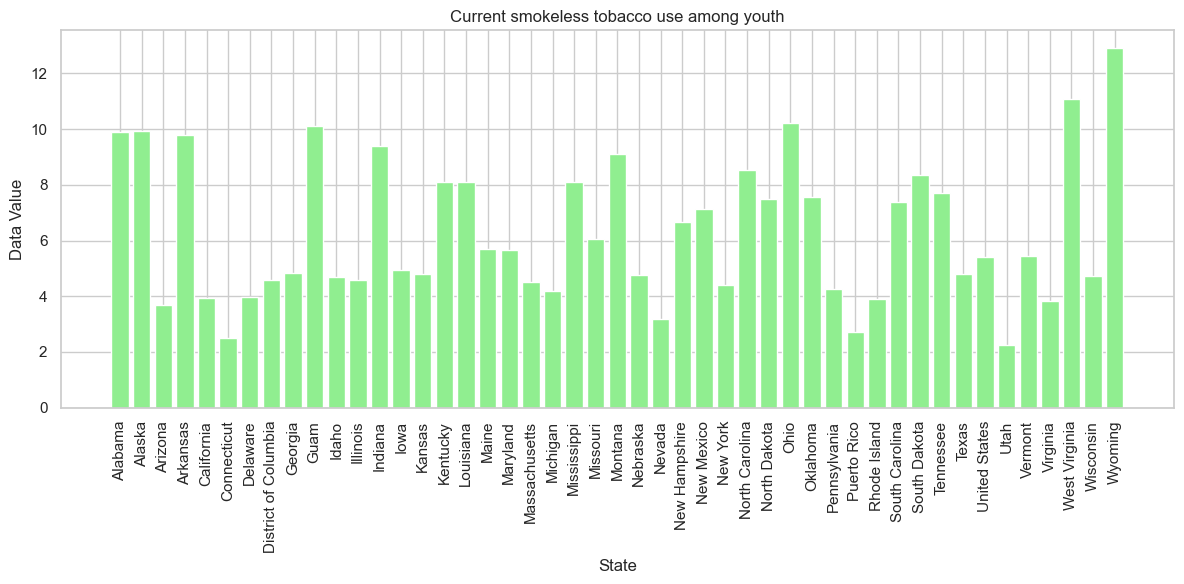

In [30]:
# Filter the data for the question 'Current smokeless tobacco use among youth'
smokeless_among_youth_df = grouped_data.loc['Current smokeless tobacco use among youth']

# Drop any NaN values (if any)
smokeless_among_youth_df = smokeless_among_youth_df.dropna()

# Plot the data as a bar chart
plt.figure(figsize=(12, 6))  # Set the figure size
plt.bar(smokeless_among_youth_df.index, smokeless_among_youth_df.values, color='lightgreen')

# Add title and labels
plt.title('Current smokeless tobacco use among youth')
plt.xlabel('State')
plt.ylabel('Data Value')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

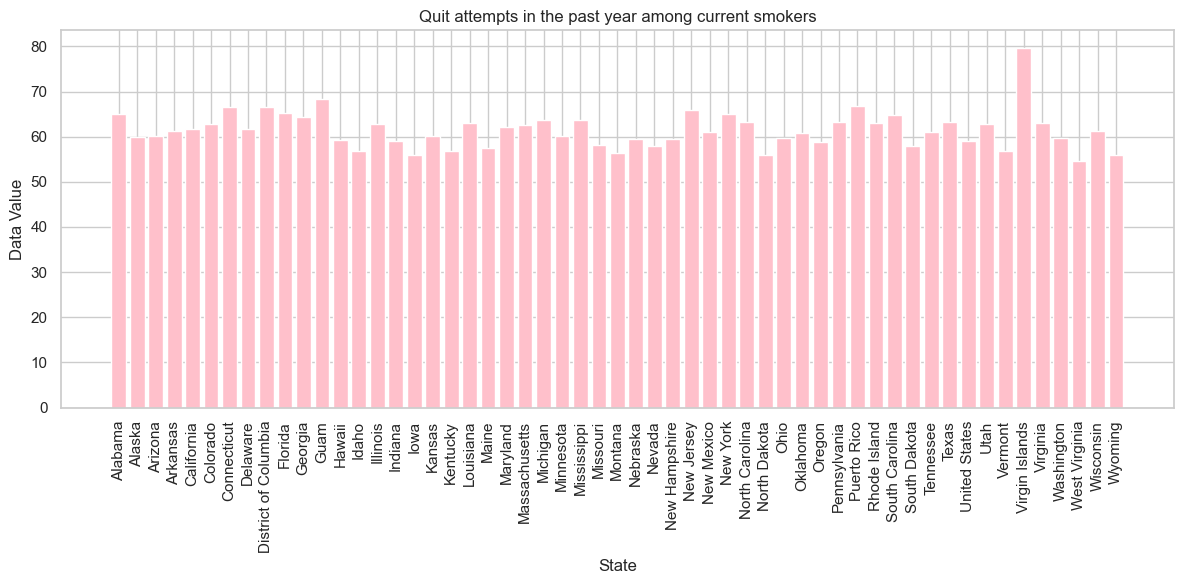

In [31]:
# Filter the data for the question 'Quit attempts in the past year among current smokers'
quit_attempts_df = grouped_data.loc['Quit attempts in the past year among current smokers']

# Drop any NaN values (if any)
quit_attempts_df = quit_attempts_df.dropna()

# Plot the data as a bar chart
plt.figure(figsize=(12, 6))  # Set the figure size
plt.bar(quit_attempts_df.index, quit_attempts_df.values, color='pink')

# Add title and labels
plt.title('Quit attempts in the past year among current smokers')
plt.xlabel('State')
plt.ylabel('Data Value')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()